In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd

import seaborn as sns
sns.set()

# El yapimi Logistic Regresyon

`X` 
 - Ogrencilerin Vize ve Final notlari
 
`w`, `b` 
 - parametreler w = [0.5 0.5].T ve b = 10
 
Tahmin edilmek istenen `y`
 - `0.5 vize + 0.5 Final + 10 > 50` ise ogrenci geciyor, `y = True`

In [2]:
d = 2     # oznitelik sayisi
n = 100   # ornek sayisi

X = np.random.randint(0,100, size = (d,n))
w_gizli = np.ones((d,1)) * 0.5
b_gizli = 10
h = np.dot(w_gizli.T, X) + b_gizli
y = (h > 50) * 1

oznitelik_isimleri = ['not'+str(i) for i in range(d)] + ['y']
veri = pd.DataFrame(data = np.concatenate((X,y)).T, columns  = oznitelik_isimleri)
veri.shape

(100, 3)

In [3]:
veri.head()

,not0,not1,y
0,17,2,0
1,38,80,1
2,21,42,0
3,83,20,1
4,24,33,0


Text(22.125, 0.5, 'Final')

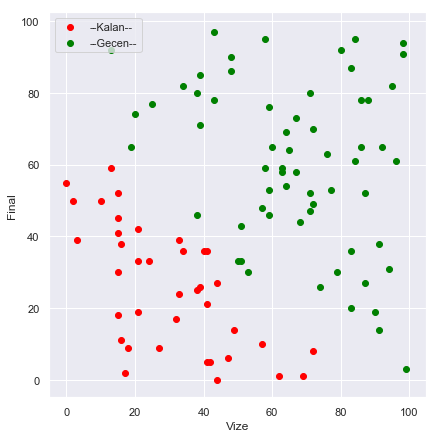

In [4]:
plt.figure(figsize=(6,6))
plt.scatter(veri[veri.y == 0].not0, veri[veri.y == 0].not1, label = "--Kalan--", color = 'red')
plt.scatter(veri[veri.y == 1].not0, veri[veri.y == 1].not1, label = "--Gecen--", color = 'green')
plt.legend()
plt.tight_layout()
plt.xlabel("Vize")
plt.ylabel("Final")

In [5]:
mini = veri.min(axis = 0)
maxi = veri.max(axis = 0)

veri_normal = (veri - mini) / (maxi - mini)
veri_normal.head()

,not0,not1,y
0,0.171717,0.020619,0.0
1,0.383838,0.824742,1.0
2,0.212121,0.432990,0.0
3,0.838384,0.206186,1.0
4,0.242424,0.340206,0.0


In [6]:
veri.head()

,not0,not1,y
0,17,2,0
1,38,80,1
2,21,42,0
3,83,20,1
4,24,33,0


In [7]:
class Classo():
    def __init__(self, X, y, alpha =  0.0001, iterasyon = 1000):
        
        #X = veri.iloc[:, :-1].values
        #X = (X - X.mean(axis = 0))/ (X.std(axis = 0)) # normallestirme
        
        #self.X = X.T
        #self.y = veri.iloc[:, -1:].values.T
        
        self.X = X
        self.y = y
        
        self.d = self.X.shape[0] # oznitelik sayisi
        self.n = self.X.shape[1] # ornek sayisi
        
        self.alpha = alpha
        self.iterasyon = iterasyon
        
        self.w  = np.random.rand(self.d,1) # rastgele d agirlik parametre degeri
        self.b = np.random.rand() # ratgeele 1 bias paarmetre degeri
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self):
        self.Js = [] 

        for i in range(self.iterasyon):
            # ileri yayilim
            h = self.sigmoid(np.dot(self.w.T, self.X) + self.b)
            # geri yayilim
            dw = (1 / self.n) * np.dot(self.X, (h - self.y).T)
            db = (1 / self.n) * np.sum(h - self.y)
            # Egim Inis
            self.w = self.w - self.alpha * dw
            self.b = self.b - self.alpha * db

            if i%100:
                cost = (- 1 / self.n) * np.sum(self.y* np.log(h) + (1 - self.y) * (np.log(1 - h)))
                self.Js.append(cost)
                
    def predict(self, X_test):
        h = self.sigmoid(np.dot(self.w.T, X_test) + self.b)
        return 1 * (h > 0.5)
        

In [8]:
X = veri_normal.iloc[:, :-1].values.T
y = veri_normal.iloc[:, -1:].values.T

cls = Classo(X, y , alpha =  0.01, iterasyon = 100000)
cls.fit()

In [9]:
print("Buldugumuz parametre degerleri")
print("\tw = {}.T".format(cls.w.T))
print("\tb = {}".format(cls.b))

Buldugumuz parametre degerleri
	w = [[10.35856467 10.63220484]].T
	b = -8.729805214213373


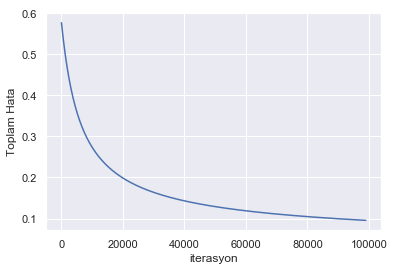

In [10]:
plt.plot(cls.Js)
plt.xlabel('iterasyon'); plt.ylabel('Toplam Hata'); 

# Create Test Data

In [11]:
d = 2     # oznitelik sayisi
n = 100   # ornek sayisi

X_test = np.random.randint(0,100, size = (d,n))
w_gizli = np.ones((d,1)) * 0.5
b_gizli = 10
h = np.dot(w_gizli.T, X_test) + b_gizli
y_test = (h > 50) * 1

oznitelik_isimleri = ['not'+str(i) for i in range(d)] + ['y']
veri_test = pd.DataFrame(data = np.concatenate((X_test,y_test)).T, columns  = oznitelik_isimleri)
veri_test.shape

(100, 3)

In [12]:
X_test.shape

(2, 100)

In [13]:
veri_test_normal = (veri_test - mini) / (maxi - mini)
veri_test_normal.head()

,not0,not1,y
0,0.373737,0.896907,1.0
1,0.383838,0.402062,0.0
2,0.252525,0.608247,1.0
3,0.858586,0.711340,1.0
4,0.858586,1.000000,1.0


In [14]:
veri_test.head()

,not0,not1,y
0,37,87,1
1,38,39,0
2,25,59,1
3,85,69,1
4,85,97,1


In [15]:
X_test = veri_test_normal.iloc[:, :-1].values.T
y = veri_test_normal.iloc[:, -1:].values.T

h = cls.predict(X_test)
h

array([[1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
        0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1]])

In [16]:
y

array([[1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
        1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
        1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
        1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
        1., 1., 0., 1.]])

In [17]:
#h = self.sigmoid(np.dot(self.w.T, X_test) + self.b)

In [18]:
z = np.dot(cls.w.T, X_test[:,0:1]) + cls.b
z

array([[4.67767879]])

In [19]:
cls.sigmoid(z)

array([[0.99078513]])

In [20]:
np.sum(y == h) /len(y)

99.0

# Simple RealWorld Data

In [22]:
from sklearn import datasets
iris = datasets.load_iris()

In [24]:
X, y = iris.data, iris.target

In [26]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
X, y = X[y < 2], y [y<2]

In [29]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
len(y_train), len(y_test)

(67, 33)

In [39]:
cls = Classo(X_train.T, y_train , alpha =  0.01, iterasyon = 100000)
cls.fit()

In [40]:
h = cls.predict(X_test.T)
h

array([[1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]])

In [41]:
y_test

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1])

In [42]:
h == y_test

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True]])